In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [3]:
def copynumber(conc, volume, um = True):
    if um == True:
        volume = volume/1e15
        conc = conc/1e6
        
        moles = conc * volume
        copies = moles * 6.023e23
        
        return copies
    elif um == False:
        volume = volume/1e15
        moles = conc / volume
        rate = moles / 6.023e23

        return rate


In [28]:
##converts to copies/s
##multiply by 10^6, then divide by volume in nm^3

def rate_converter(conc,V):
    conc1 = conc/0.602214076 ## convert from uM-1 s-1 to nm^3/us
    conc2 = conc1 * 1e6 ##convert to seconds from microseconds
    nanoV = V*1e9 ##convert volume from um3 to nm3
    return conc2/nanoV ##divide by volume to get copies per second

In [5]:
def concentration(copy, volume, area = 65.7894,  twoD = False):

    if twoD == True:

        area = area/1e10

        copy = copy/6.023e23
        copy = copy/area
        
        return copy

    else:

        volume = volume/1e15

        copy = copy/6.023e23
        copy = copy/volume

        return copy

In [26]:
0.231*0.231*1.5

0.08004150000000002

In [11]:
(231*231*1500)

80041500

In [6]:
rate_converter(0.03791999300713553)

0.06296762981530762

In [10]:
copynumber(7,V)

337.46296815

# Time Series Plot

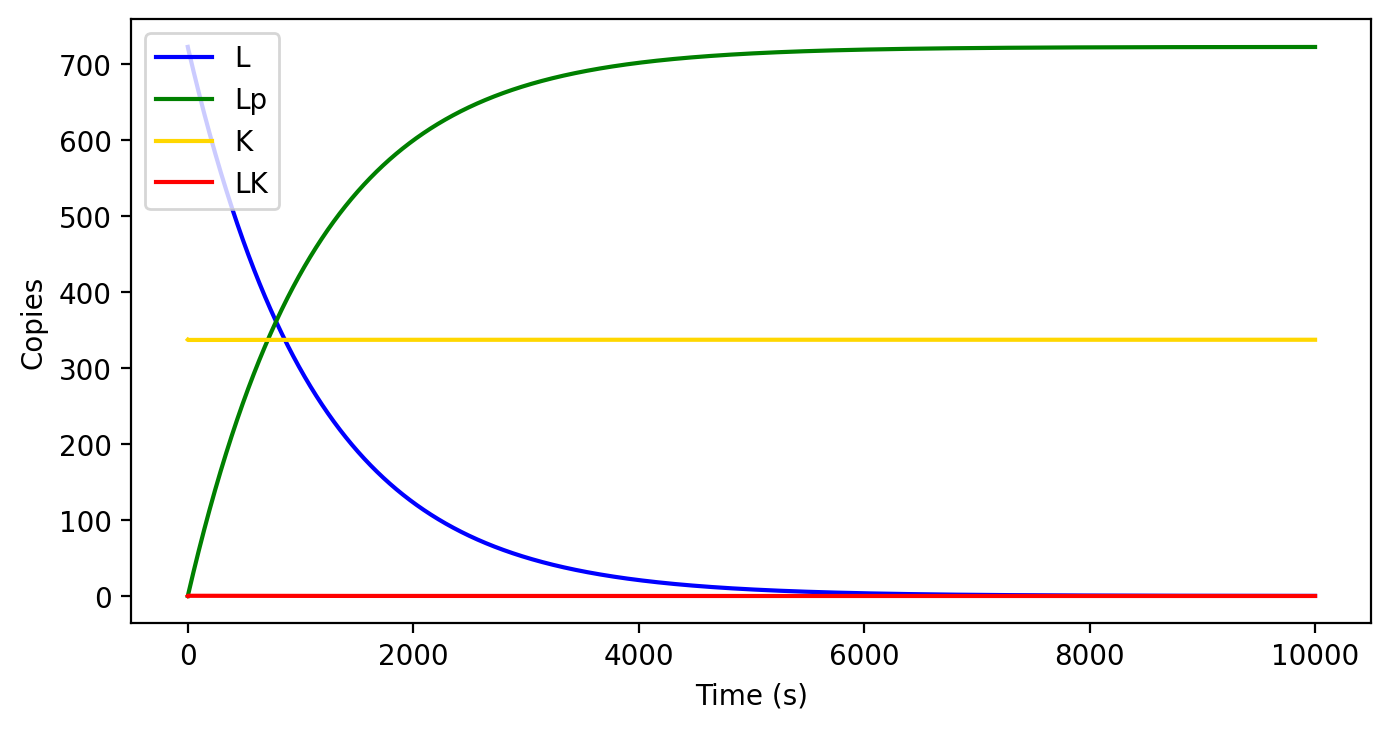

In [36]:
##'ka1': 0.06296910163921543, 'kb1': 97.82403936369272, 'kcat1': 277.346311110198,
# 'ka2': 0.7163743434133126, 'kb2': 32.47470589751822, 'ka3': 7.559407489840667, 'kb3': 223.36133248956713, 
# 'ka4': 0.8199153260341503, 'kb4': 1.8864353860273186, 'ka7': 0.9946959796263228, 'kb7': 90.04601085463732, 
# 'kcat7': 70.73363511534804, 'V': 0.07994067550020652, 'VA': 1.5, 'sigma': 0.001, 'L': 87.30083542079618, 
# 'Lp': 0.0, 'K': 7.111613238604031, 'P': 5.451528942232038, 'LK': 0.0, 'A': 10, 'LpA': 0.0, 'LpAK': 0.0, 
# 'LpAP': 0.0, 'LpAPLp': 0.0, 'LpAKL': 0.0, 'LpP': 0.0


# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,10000,num=10000)

V = 0.0800415



params = [rate_converter(0.03791999300713553,V), 700.82403936369272, 2.346311110198]
#params = [0.06296910163921543, 700.82403936369272, 2.346311110198]

initial_populations = [copynumber(15,V),0,copynumber(7,V),0]
# ka2 = 0.2
# kb2 = 0.1

# ka3 = 0.6
# kb3 = 0.1 

# ka4 = 0.2
# kb4 = 0.1
# kcat4 = 1

# ka5 = 0.3
# kb5 = 0.1
# kcat5 = 2

# ka6 = 0.4
# kb6 = 0.2

# ka7 = 0.6
# kb7 = 0.2

# ka8 = 0.4
# kb8 = 0.1
# kcat8 = 5

# Km4 = (kb4 + kcat4)/ka4
# Km5 = (kb5 + kcat5)/ka5
# Km8 = (kb8 + kcat8)/kb8

# K = 100


# params = [ka1,kb1,kcat1,ka2,kb2,ka3,kb3,ka4,kb4,ka5,kb5,kcat5]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(current_counts, t, params):



    L = current_counts[0] 
    Lp = current_counts[1]
    K = current_counts[2]
    LK = current_counts[3]
   

    ka1 = params[0]
    kb1 = params[1]
    kcat1 = params[2]




    dL = (kb1*LK) - (ka1*L*K)
    dLp = (kcat1*LK)
    dK = (kb1*LK) - (ka1*L*K) + (kcat1*LK) 
    dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)


    return([dL, dLp, dK, dLK])	

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

#solutions = solve_ivp(fun=calculate_current_population_change_rates,method='BDF', t_span=(0, 100), 
#            y0=initial_populations, t_eval=t, args=(params,),rtol=1e-6, atol=1e-9)


#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions[:,0], color="b", label = 'L')
plt.plot(t,solutions[:,1], color="g", label = 'Lp')
plt.plot(t,solutions[:,2], color="gold", label = 'K')
plt.plot(t,solutions[:,3], color="r", label = 'LK')


plt.xlabel('Time (s)')
plt.ylabel('Copies')
plt.legend()

plt.show()



## solve_ivp

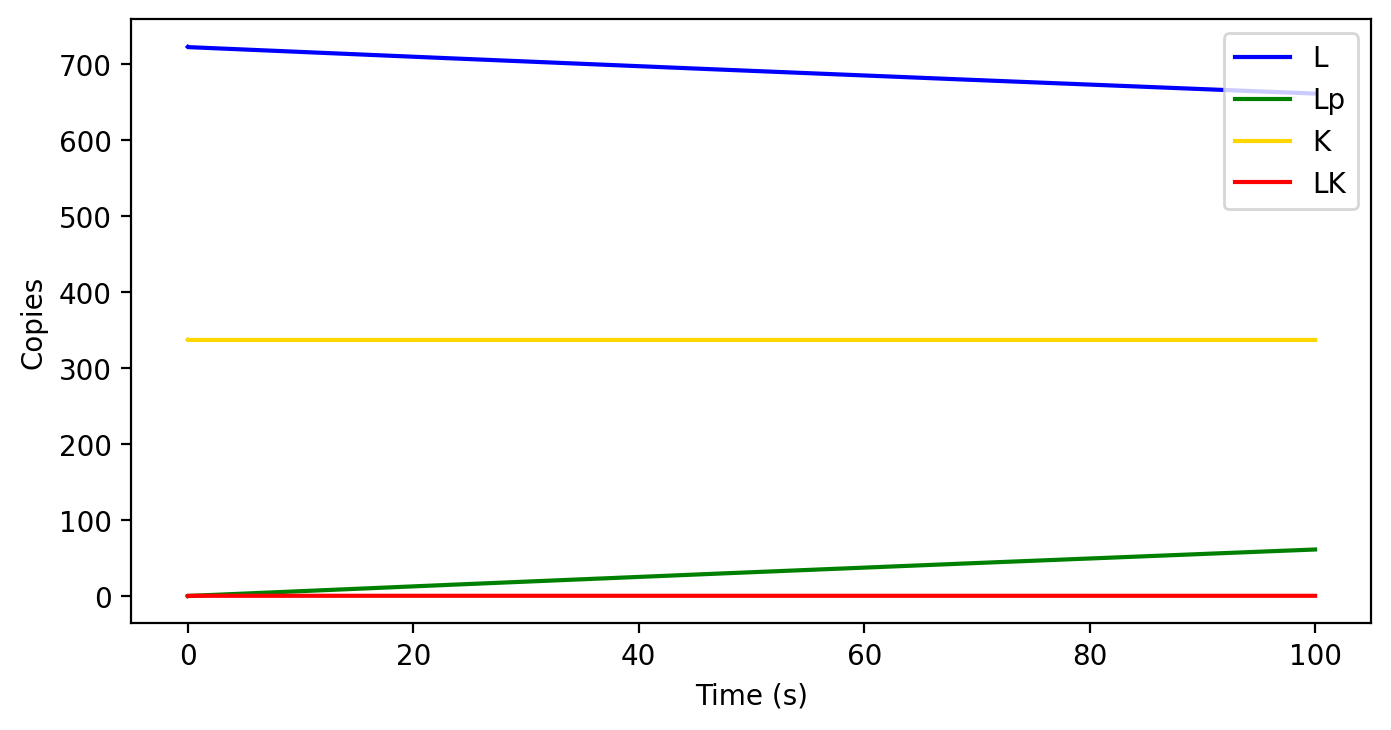

In [29]:
##'ka1': 0.06296910163921543, 'kb1': 97.82403936369272, 'kcat1': 277.346311110198,
# 'ka2': 0.7163743434133126, 'kb2': 32.47470589751822, 'ka3': 7.559407489840667, 'kb3': 223.36133248956713, 
# 'ka4': 0.8199153260341503, 'kb4': 1.8864353860273186, 'ka7': 0.9946959796263228, 'kb7': 90.04601085463732, 
# 'kcat7': 70.73363511534804, 'V': 0.07994067550020652, 'VA': 1.5, 'sigma': 0.001, 'L': 87.30083542079618, 
# 'Lp': 0.0, 'K': 7.111613238604031, 'P': 5.451528942232038, 'LK': 0.0, 'A': 10, 'LpA': 0.0, 'LpAK': 0.0, 
# 'LpAP': 0.0, 'LpAPLp': 0.0, 'LpAKL': 0.0, 'LpP': 0.0


# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,100,num=10000)

V = 0.0800415



params = [rate_converter(0.03791999300713553,V), 700.82403936369272, 2.346311110198]
#params = [0.06296910163921543, 700.82403936369272, 2.346311110198]

initial_populations = [copynumber(15,V),0,copynumber(7,V),0]
# ka2 = 0.2
# kb2 = 0.1

# ka3 = 0.6
# kb3 = 0.1 

# ka4 = 0.2
# kb4 = 0.1
# kcat4 = 1

# ka5 = 0.3
# kb5 = 0.1
# kcat5 = 2

# ka6 = 0.4
# kb6 = 0.2

# ka7 = 0.6
# kb7 = 0.2

# ka8 = 0.4
# kb8 = 0.1
# kcat8 = 5

# Km4 = (kb4 + kcat4)/ka4
# Km5 = (kb5 + kcat5)/ka5
# Km8 = (kb8 + kcat8)/kb8

# K = 100


# params = [ka1,kb1,kcat1,ka2,kb2,ka3,kb3,ka4,kb4,ka5,kb5,kcat5]

# Calculates current population change rates for current timestep
#################################################################
def calculate_current_population_change_rates(t, current_counts, params):



    L = current_counts[0] 
    Lp = current_counts[1]
    K = current_counts[2]
    LK = current_counts[3]
   

    ka1 = params[0]
    kb1 = params[1]
    kcat1 = params[2]




    dL = (kb1*LK) - (ka1*L*K)
    dLp = (kcat1*LK)
    dK = (kb1*LK) - (ka1*L*K) + (kcat1*LK) 
    dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)


    return([dL, dLp, dK, dLK])	

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
#solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

solutions = solve_ivp(fun=calculate_current_population_change_rates,method='BDF', t_span=(0, 100), 
            y0=initial_populations, t_eval=t, args=(params,),rtol=1e-6, atol=1e-9)


#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions.y[0,:], color="b", label = 'L')
plt.plot(t,solutions.y[1,:], color="g", label = 'Lp')
plt.plot(t,solutions.y[2,:], color="gold", label = 'K')
plt.plot(t,solutions.y[3,:], color="r", label = 'LK')


plt.xlabel('Time (s)')
plt.ylabel('Copies')
plt.legend()

plt.show()



In [19]:
solutions

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 2223
     njev: 66
      nlu: 204
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00010001e-02, 2.00020002e-02, ...,
       9.99799980e+01, 9.99899990e+01, 1.00000000e+02])
 t_events: None
        y: array([[ 7.23134932e+02,  3.77754060e+02,  3.69835373e+02, ...,
        -5.19993582e-19, -5.20457827e-19, -5.20922071e-19],
       [ 0.00000000e+00,  7.91870257e+00,  1.58374066e+01, ...,
         7.23134932e+02,  7.23134932e+02,  7.23134932e+02],
       [ 3.37462968e+02,  7.98499116e-04,  8.15596210e-04, ...,
         3.37462968e+02,  3.37462968e+02,  3.37462968e+02],
       [ 0.00000000e+00,  3.37462170e+02,  3.37462153e+02, ...,
        -1.49681175e-14, -1.50745375e-14, -1.51809575e-14]])
 y_events: None

In [32]:
parameter_values = {  "ka1": {"min": 1000/1e6, "max": 1e6/1e6},  
            "kb1": {"min": 0, "max": 100},             				        
            "kcat1": {"min": 0, "max": 500},         
            "ka2": {"min": 1000/1e6, "max": 1e6/1e6},         
            "kb2": {"min": 0, "max": 1000}, 
            "ka3": {"min": 1e3/1e6, "max":1e8/1e6}, 
            "kb3": {"min": 0, "max":500},
            "ka4": {"min": 1e3/1e6, "max":1e6/1e6},
            "kb4": {"min": 0, "max": 100},  
            "ka5": {"min": 1e3/1e6, "max": 1e6/1e6}, 
            "kb5": {"min": 0, "max": 1000}, 
            "kcat5": {"min": 0, "max": 200},
            "V": {"min": 2600, "max": 2600},
            "VA": {"min": 0.5, "max": 2},
            "sigma": {"min": 0.001, "max": 0.001},
            "L": {"min": 1, "max": 1e2},  
            "Lp": {"min": 0, "max": 0}, 
            "K": {"min": 0.01, "max": 0.1},
            "P": {"min": 0.01, "max": 0.1},
            "LK": {"min": 0, "max": 0}, 
            "A": {"min": .1, "max": 10}, 
            "LpA": {"min": 0, "max": 0},
            "LpAK": {"min": 0, "max": 0}, 
            "LpAP": {"min": 0, "max": 0}, 	
            "LpAPLp": {"min": 0, "max": 0},
            "LpAKL": {"min": 0, "max": 0},
            "LpP": {"min": 0, "max": 0},
            }   	

filename =  os.path.join(".", "SIMPLE2_oscillatorCostTwo")  
print(filename)   
model = Oscillator(parameter_values, np.array(["ka1", "kb1", "kcat1", "ka2", "kb2", "ka3", "kb3", "ka4","kb4","ka5","kb5","kcat5","V","VA","sigma","L","Lp","K","P","LK","A","LpA","LpAK","LpAP","LpAPLp","LpAKL","LpP"]), np.array(["L","Lp","K","P",0,"A",0,0,0,0,0,0]), mode=1)  
#solver = Solver(model)         
#solver.run(filename) 

./SIMPLE2_oscillatorCostTwo
